In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Training data

In [2]:
#read dataframe of titanic 
train=pd.read_csv('train.csv')

In [3]:
#show first five data entries of data frame
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#to check number of rows and columns in dataframe ( [rows,columns] )
train.shape

(891, 12)

As shown above this dataset having 891 rows and 12 columns 

In [5]:
#check columns name
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

There are 12 columns i.e ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [6]:
#check data type of each columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From above data we can say that there is columns having data type int64,float64 and object 

In [7]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


I use .isnull() function to find null values in data frame
here, True = Null  and False = Not Null
but is is hard to read to dataset which having large entries 

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, we use previous .isnull() function but here we use sum() function also it add all Null values count and return their sum.

As shown above data there is only two rows ['Age','Cabin','Embarked'] which contain Null values where as Age contain 177 null values and Cabin contain 687 null values out of 891 values

Text(0.5, 1.0, 'T H I S    P L O T   S H O W   N U L L   V A L U E S   ')

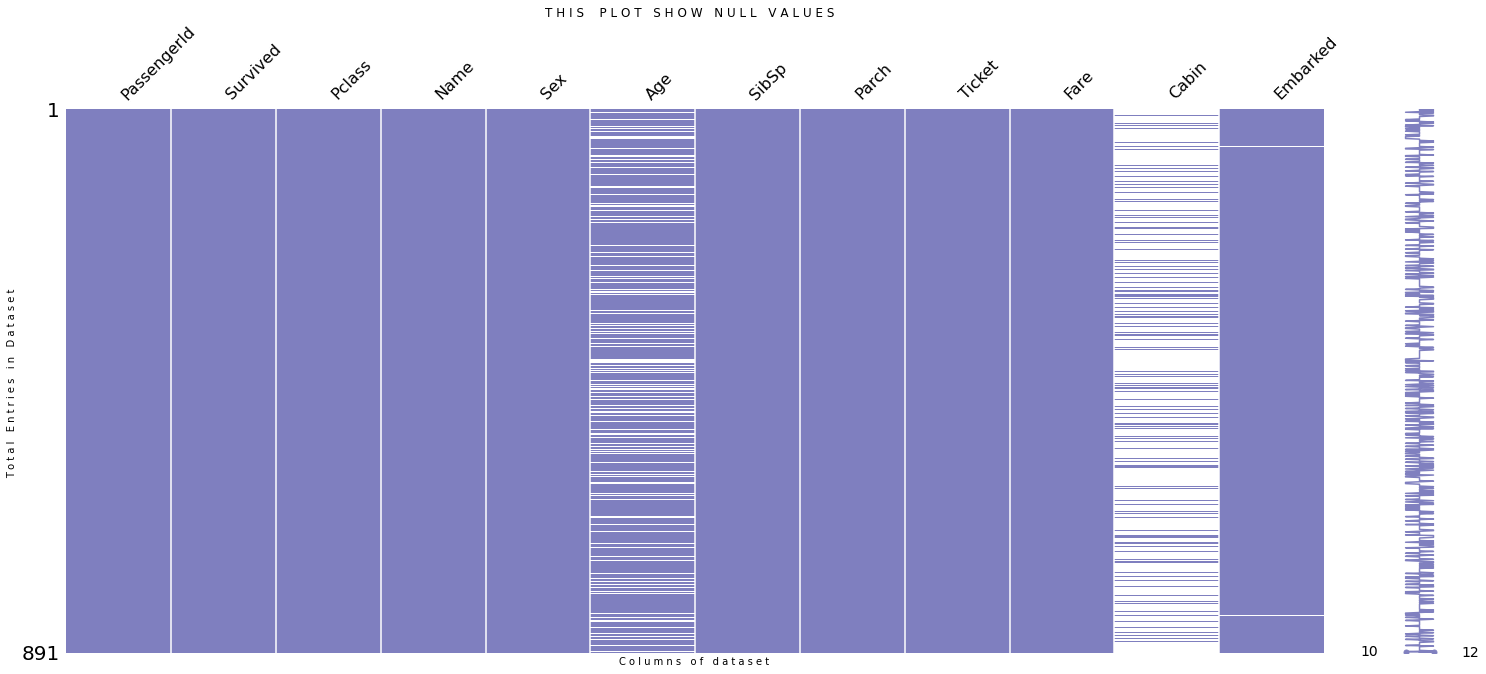

In [10]:
#visulization of Null values
import missingno as mn
mn.matrix(train,color=(0.50,0.50,0.75),)
plt.xlabel("C o l u m n s   o f   d a t a s e t ")
plt.ylabel("T o t a l   E n t r i e s   i n   D a t a s e t ")
plt.title("T H I S    P L O T   S H O W   N U L L   V A L U E S   ")

Above plot is plotted between columns of dataframe and rows of dataframe .                    
Where vertical white line represent a separation of each columns and horizontal white line represent a Null values.             
Here, only in three columns having Null Values ( ['Age' , 'Cabin' , 'Embarked'] )                          


Now, We want to remove/replace this null values for replace we can use mode/mean/median of that perticular column and for remove we simply drop whole column  or drop only that perticular row which having null values(Depends on condition). 

###### For our dataset there is 177 Null values in [ ' Age ' ] columns therefore we can replace it my mean of [ ' Age ' ] columns and 867 Null values in [ ' Cabin ' ] Column therefore  we drop this column because it contain ~80% null values also we drop [ ' Embarked ' ] columns because it contain 2 null values and it data type is Object so we can't replace it by integers and dataframe is not that much dependent on this column .

In [12]:
#Drop 'Cabin' Column and 'Embarked' Column and show updated dataframe
train.drop(['Cabin','Embarked'], axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [13]:
#replace NaN values of Age by mean of Age column
train.Age=train.Age.fillna(train.Age.mean())

Text(0.5, 1.0, 'T H I S    P L O T   S H O W   N U L L   V A L U E S   ')

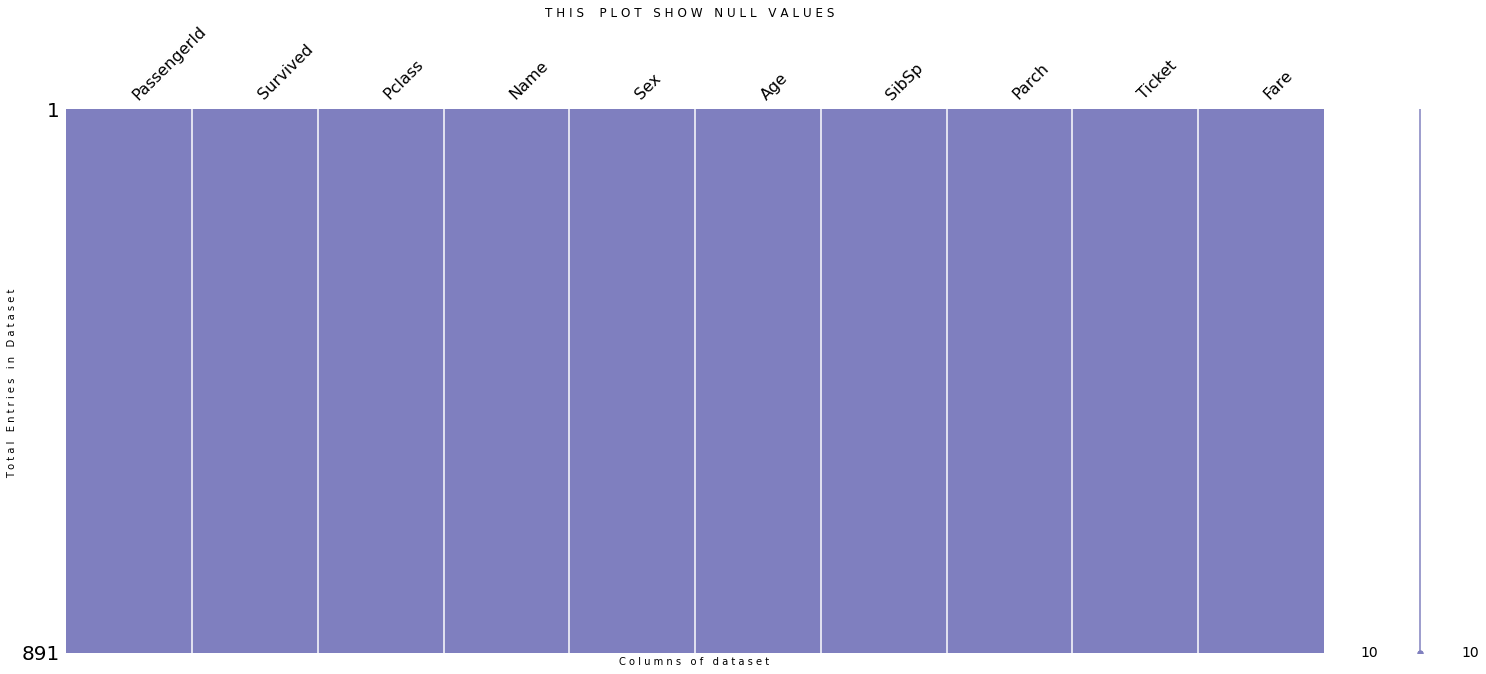

In [14]:
#Now you can see that there is no Null values in our dataframe
import missingno as mn
mn.matrix(train,color=(0.50,0.50,0.75),)
plt.xlabel("C o l u m n s   o f   d a t a s e t ")
plt.ylabel("T o t a l   E n t r i e s   i n   D a t a s e t ")
plt.title("T H I S    P L O T   S H O W   N U L L   V A L U E S   ")

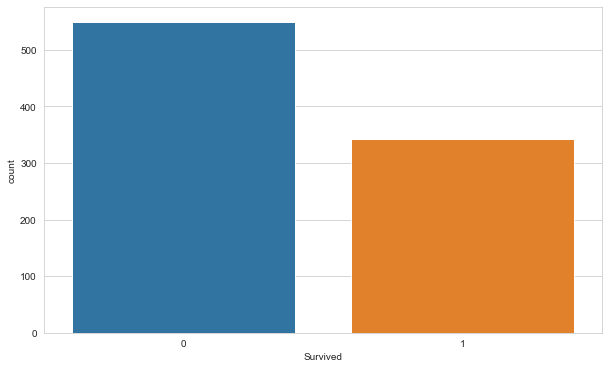

In [16]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

From this countplot we can say that is maximum people are not survived i.e ~ 554 and some people are survived i.e ~ 334

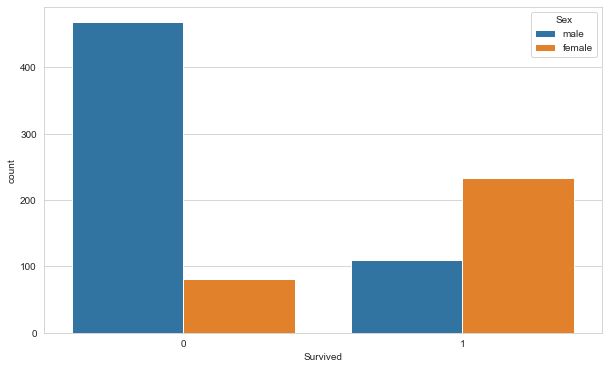

In [17]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

From this countplot we can say that if we divide survived rating Sexwise then we can see that :           
maximum males are not survived and few males are survived .               
maximum females are survived and few females are not survived .

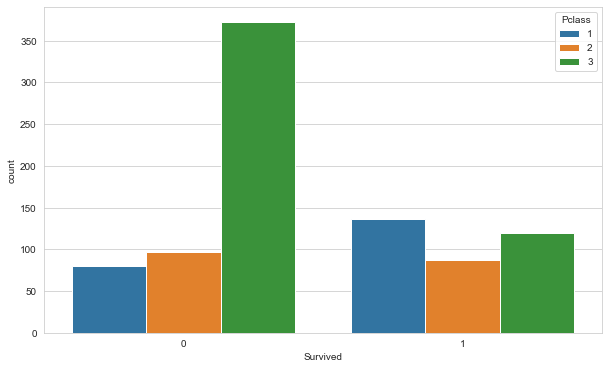

In [18]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

This Pclass plot is not show that much dependence with surviving rate so we can drop ['Pclass'] column 

In [19]:
#Drop 'Pclass' Column and show updated dataframe
train.drop(['Pclass'], axis=1,inplace=True)
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


###### Now,there is some column in our dataframe that's not required for us so we can drop it .

[' PassengerId ',' Name ' , ' Ticket ' , ' Fare ']

In [20]:
#Drop [' PassengerId ',' Name ' , ' Ticket ' , ' Fare '] Columns and show updated dataframe
train.drop(['PassengerId','Name','Ticket','Fare'], axis=1,inplace=True)
train.head()

,Survived,Sex,Age,SibSp,Parch
0,0,male,22.0,1,0
1,1,female,38.0,1,0
2,1,female,26.0,0,0
3,1,female,35.0,1,0
4,0,male,35.0,0,0


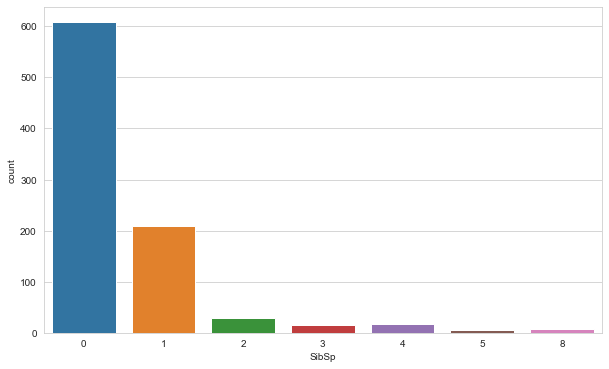

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(train['SibSp'])

From countplot of SibSp i.e number of Siblings/Spouses we can say that,those people does't having any Sibling they survived and also those having one Sibling from this some people are survived but those having more than 1 Sibling they are survived that much.

Now, our required data is ready but there is still  one problem .                               
Machine Learning Algorithms is implement in numerical data and we have one column ie ['Sex'] column which contain Object type values we want to convert it into numeric

In [22]:
#here we can split sex column in 2 numerical columns
split_sex=pd.get_dummies(train.Sex)

In [23]:
#concat this both column with our dataset and show
train=pd.concat([train,split_sex],axis=1)
train.head()

,Survived,Sex,Age,SibSp,Parch,female,male
0,0,male,22.0,1,0,0,1
1,1,female,38.0,1,0,1,0
2,1,female,26.0,0,0,1,0
3,1,female,35.0,1,0,1,0
4,0,male,35.0,0,0,0,1


In [24]:
#we can drop ['sex'] and ['female'] columns from data frame and show 
train.drop(['Sex','female'],axis=1,inplace=True)

In [25]:
train.head()

,Survived,Age,SibSp,Parch,male
0,0,22.0,1,0,1
1,1,38.0,1,0,0
2,1,26.0,0,0,0
3,1,35.0,1,0,0
4,0,35.0,0,0,1


In [26]:
#here we rename the male column into Sex 
#note: '1'= male and  '0' = Female
train.rename(columns = {'male':'Sex'}, inplace = True) 
train.head()

,Survived,Age,SibSp,Parch,Sex
0,0,22.0,1,0,1
1,1,38.0,1,0,0
2,1,26.0,0,0,0
3,1,35.0,1,0,0
4,0,35.0,0,0,1


### Testing data


In [27]:
#read testing dataset of titanic 
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test.drop(['PassengerId','Name','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
test.head()

,Pclass,Sex,Age,SibSp
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,1


In [29]:
test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
dtype: int64

Text(0.5, 1.0, 'T H I S    P L O T   S H O W   N U L L   V A L U E S   ')

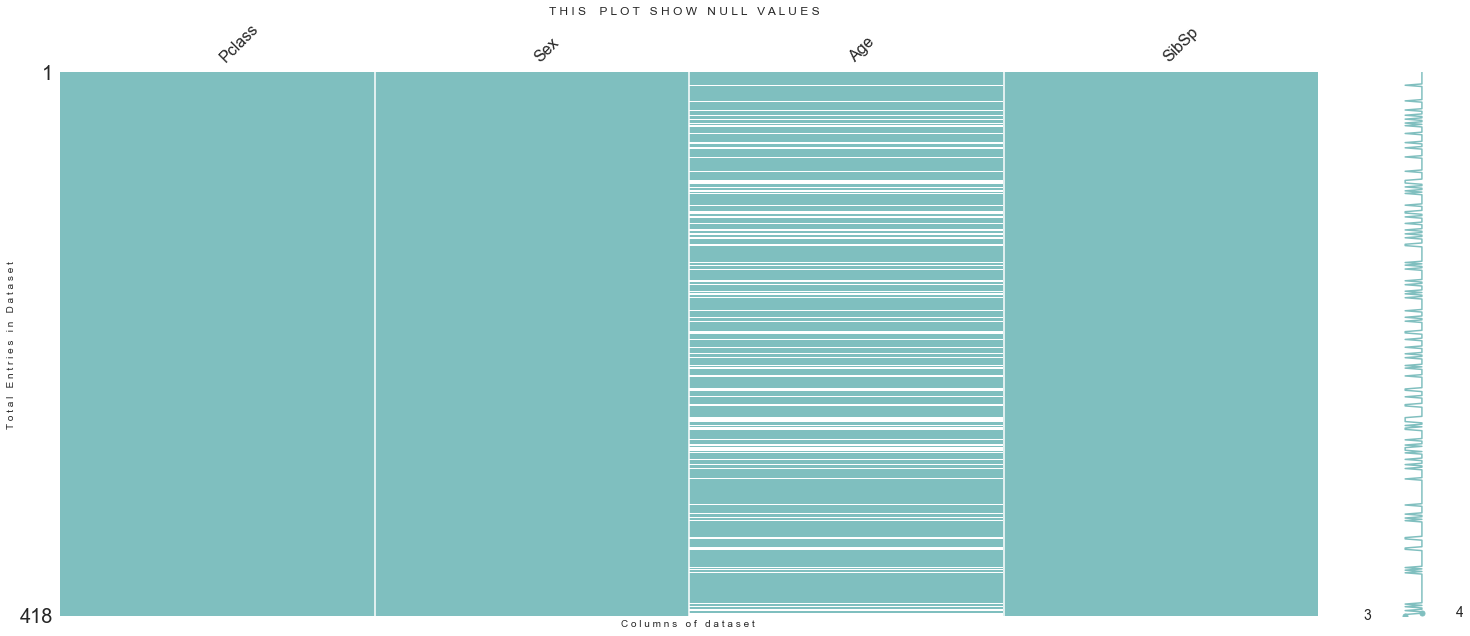

In [30]:
#visulization of Null values
mn.matrix(test,color=(0.50,0.75,0.75),)
plt.xlabel("C o l u m n s   o f   d a t a s e t ")
plt.ylabel("T o t a l   E n t r i e s   i n   D a t a s e t ")
plt.title("T H I S    P L O T   S H O W   N U L L   V A L U E S   ")

In [31]:
#replace NaN values of Age by mean of Age column
test.Age=test.Age.fillna(test.Age.mean())
test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
dtype: int64

Text(0.5, 1.0, 'T H I S    P L O T   S H O W   N U L L   V A L U E S   ')

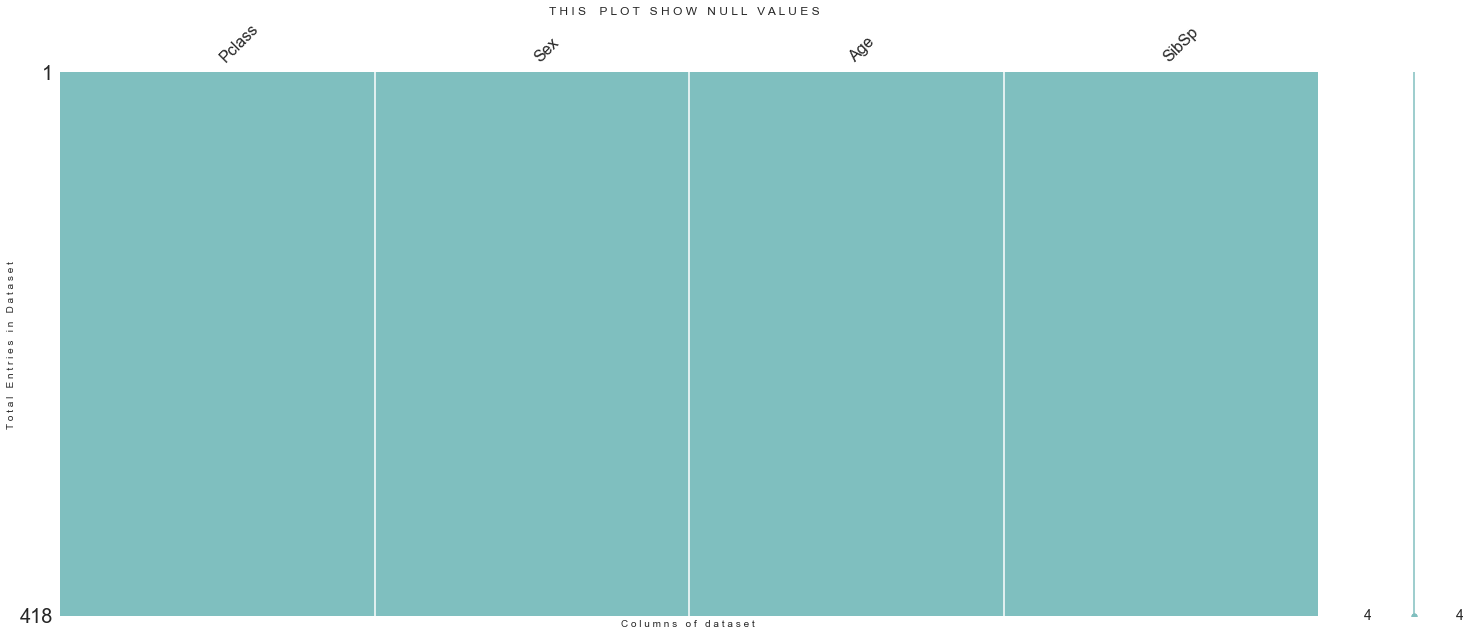

In [32]:
#visulization of Null values
mn.matrix(test,color=(0.50,0.75,0.75),)
plt.xlabel("C o l u m n s   o f   d a t a s e t ")
plt.ylabel("T o t a l   E n t r i e s   i n   D a t a s e t ")
plt.title("T H I S    P L O T   S H O W   N U L L   V A L U E S   ")

In [33]:
#here we can split sex column in 2 numerical columns
split_sex=pd.get_dummies(test.Sex)

In [34]:
#concat this both column with our dataset and show
test=pd.concat([test,split_sex],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,female,male
0,3,male,34.5,0,0,1
1,3,female,47.0,1,1,0
2,2,male,62.0,0,0,1
3,3,male,27.0,0,0,1
4,3,female,22.0,1,1,0


In [35]:
#we can drop ['sex'] and ['female'] columns from data frame and show 
test.drop(['Sex','female'],axis=1,inplace=True)
test.head()

,Pclass,Age,SibSp,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0


In [36]:
#here we rename the male column into Sex 
#note: '1'= male and  '0' = Female
test=test.rename(columns={'male': 'Sex'})
test.head()

,Pclass,Age,SibSp,Sex
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0


In [94]:
test.shape


(418, 3)

In [95]:
train.shape

(891, 4)

In [96]:
data=train
data=data.append(test)
data.shape

C:\Users\rushi\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(1309, 4)

In [97]:
data=data.dropna()
data.shape

(891, 4)

### applying machine learning agricultural to data

X=df0.drop('Survived',axis=1)
X.head()

Y=df0['Survived']
Y.head()

In [90]:
X=data.iloc[:,1:]
X.head()

,Sex,SibSp,Survived
0,1,1,0.0
1,0,1,1.0
2,0,0,1.0
3,0,1,1.0
4,1,0,0.0


In [91]:
Y=data['Survived']
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [84]:
test.isnull().sum()

Age      0
SibSp    0
Sex      0
dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=11)

In [87]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
acc=model.score(x_test,y_test)

In [89]:
acc

1.0